# Lab 1: Review of plotting in Python

In [1]:
# Magic function
%matplotlib inline
#matplotlib notebook #for interactive plots

In [2]:
# libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time

In [3]:
# load in datasets
summer_ctd_path = loadmat('/Users/tyler/Desktop/176/Summer_SF.mat')
winter_ctd_path = loadmat('/Users/tyler/Desktop/176/Winter_SF.mat')

In [4]:
# seeing what variables are available (namespace) 
%whos

Variable          Type        Data/Info
---------------------------------------
date              type        <class 'datetime.date'>
datetime          type        <class 'datetime.datetime'>
loadmat           function    <function loadmat at 0xb22c45510>
np                module      <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
plt               module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
summer_ctd_path   dict        n=8
time              type        <class 'datetime.time'>
winter_ctd_path   dict        n=8


In [5]:
# length of this structure, has 8 variables
print(len(summer_ctd_path))
# size of a variable (usually gives back an array)
print(summer_ctd_path['pres'].size)

8
700


In [6]:
# how to see what this data structure-file holds: " .keys() "
summer_ctd_path.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cond', 'lat', 'lon', 'pres', 'temp'])

In [7]:
# index through variables using ['variablename']
summer_ctd_path['cond'];

# Assigning Variables

In [8]:
# index through data file and assign variables
summer_pressure = summer_ctd_path['pres'][0][:]
summer_temp = summer_ctd_path['temp'][0][:]
winter_pressure = winter_ctd_path['pres'][0][:]
winter_temp = winter_ctd_path['theta'][:]
summer_cond = summer_ctd_path['cond'][0][:]


# Figure Objects and Axes

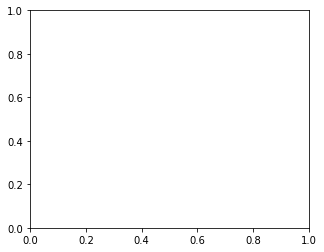

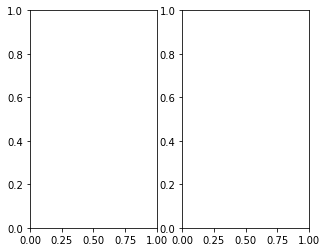

In [9]:
# creating a figure object with one plot
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

# create a figure object with multiple
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5,4))


# Making a single plot

Text(0.5, 1.0, 'Temperature vs Pressure in Sermilik Fjord')

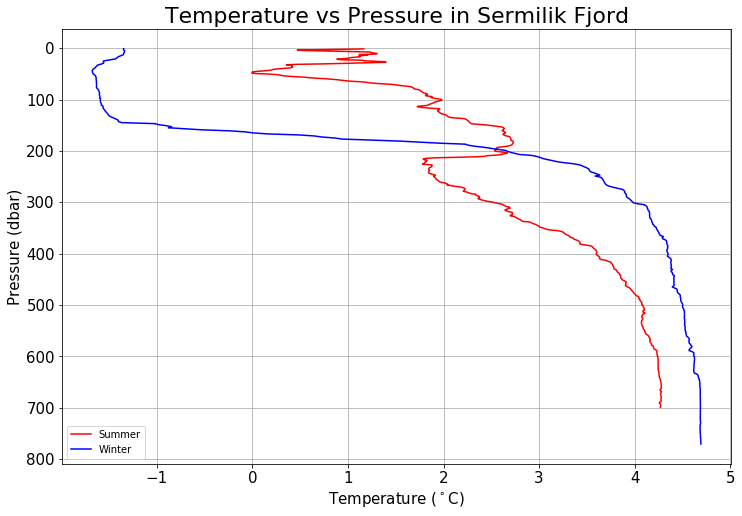

In [11]:
# plotting summer pressure vs temp
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html

# Create just a figure and only one subplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(summer_temp, summer_pressure, c='red', label='Summer')
ax.plot(winter_temp, winter_pressure, c='blue',label='Winter')

# axis methods
#ax.set_title('name')
ax.set_xlabel('Temperature ($^\circ$C)', fontsize = 15)
ax.set_ylabel('Pressure (dbar)', fontsize = 15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# plot methods
plt.gca().invert_yaxis()
plt.grid()
plt.legend(loc=3, prop={'size':10})
plt.title('Temperature vs Pressure in Sermilik Fjord', fontsize=22)
#plt.savefig('localpath/nameofplot', dpi=300)

# Making a figure object with multiple subplots

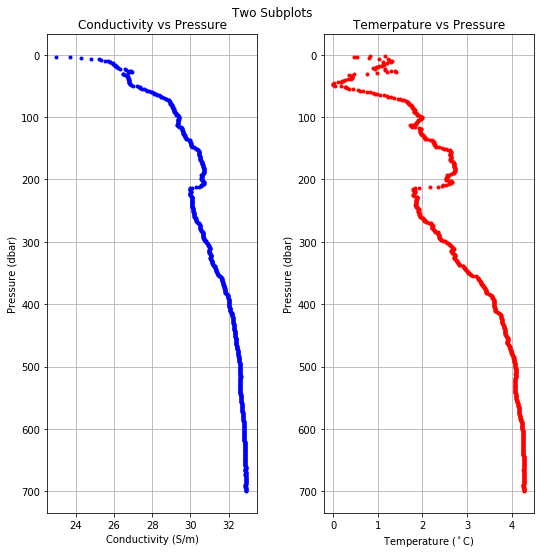

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
fig.suptitle('Two Subplots')


# subplot1: conductivity vs pressure (summer)
ax1.plot(summer_cond, summer_pressure, '.b')
ax1.invert_yaxis()
ax1.grid()
ax1.set_xlim([22.5,33.5])
ax1.set_title('Conductivity vs Pressure') # subplot titles
ax1.set_xlabel('Conductivity (S/m)')
ax1.set_ylabel('Pressure (dbar)')


# subplot2: temperature vs pressure (summer)
ax2.plot(summer_temp, summer_pressure, '.r')
ax2.invert_yaxis()
ax2.grid()
ax2.set_title('Temerpature vs Pressure')
ax2.set_xlabel('Temperature ($^\circ$C)')
ax2.set_ylabel('Pressure (dbar)')
plt.tight_layout(pad=2.3)


# Making a color plot 

In [14]:
# read in data
bath_path = loadmat('/Users/tyler/Desktop/176/Sermilik_Bathy.mat')
lon = bath_path['lonS'][0][:]
lat = bath_path['latS'][0][:]
depth = bath_path['zS'] #a 2-D array for depth values at each horizontal point on x-y plane

Text(0.5, 1.0, 'Locations of CTDs in the Sermilik Fjord')

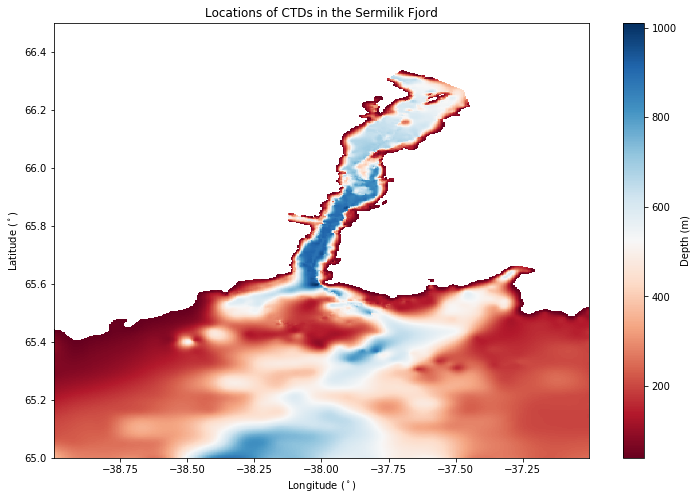

In [15]:
# creating color plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
c = ax.pcolor(lon,lat,depth, cmap='RdBu')
fig.colorbar(c, ax=ax, label='Depth (m)')
ax.set_xlabel('Longitude ($^\circ$)')
ax.set_ylabel('Latitude ($^\circ$)')
ax.set_title('Locations of CTDs in the Sermilik Fjord')